In [125]:
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 799 kB/s 


In [51]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus

#from sklearn import datasets  
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import externals
from io import StringIO
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
import matplotlib.image as mpimg 
from sklearn.tree import export_graphviz

In [53]:
df = pd.read_csv('/content/Company_Data.csv')

In [54]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [55]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [56]:
data = df.copy()

In [57]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [59]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [60]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [61]:
data['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [62]:
data.shape

(400, 11)

In [63]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


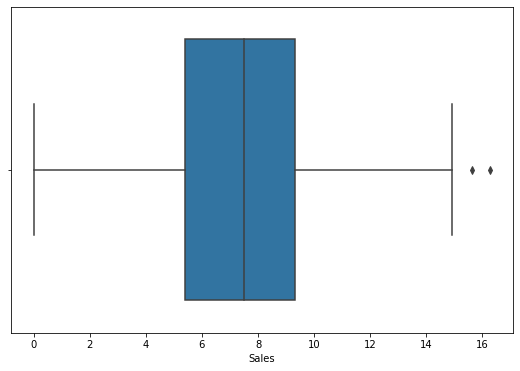

In [64]:
# Check for outliers
ax = sns.boxplot(data['Sales'])

In [65]:
plt.rcParams["figure.figsize"] = 9,6

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


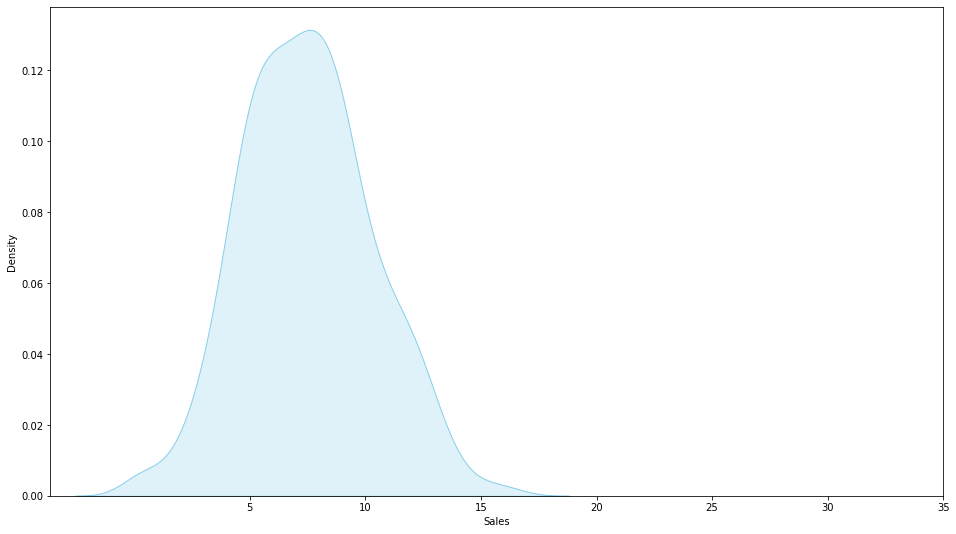

In [66]:
plt.figure(figsize=(16,9))
print("Skew: {}".format(data['Sales'].skew()))
print("Kurtosis: {}".format(data['Sales'].kurtosis()))
ax = sns.kdeplot(data['Sales'],shade=True, color='skyblue')
plt.xticks([i for i in range(5,40,5)])
plt.show()

Skew: 0.18556036318721578  The data is Skwed on the right.   
Kurtosis: -0.08087736743346197  The data has negative Kurtosis.

In [67]:
obj_colum = data.select_dtypes(include='object').columns.tolist()

In [68]:
num_columns = data.select_dtypes(exclude='object').columns.tolist()

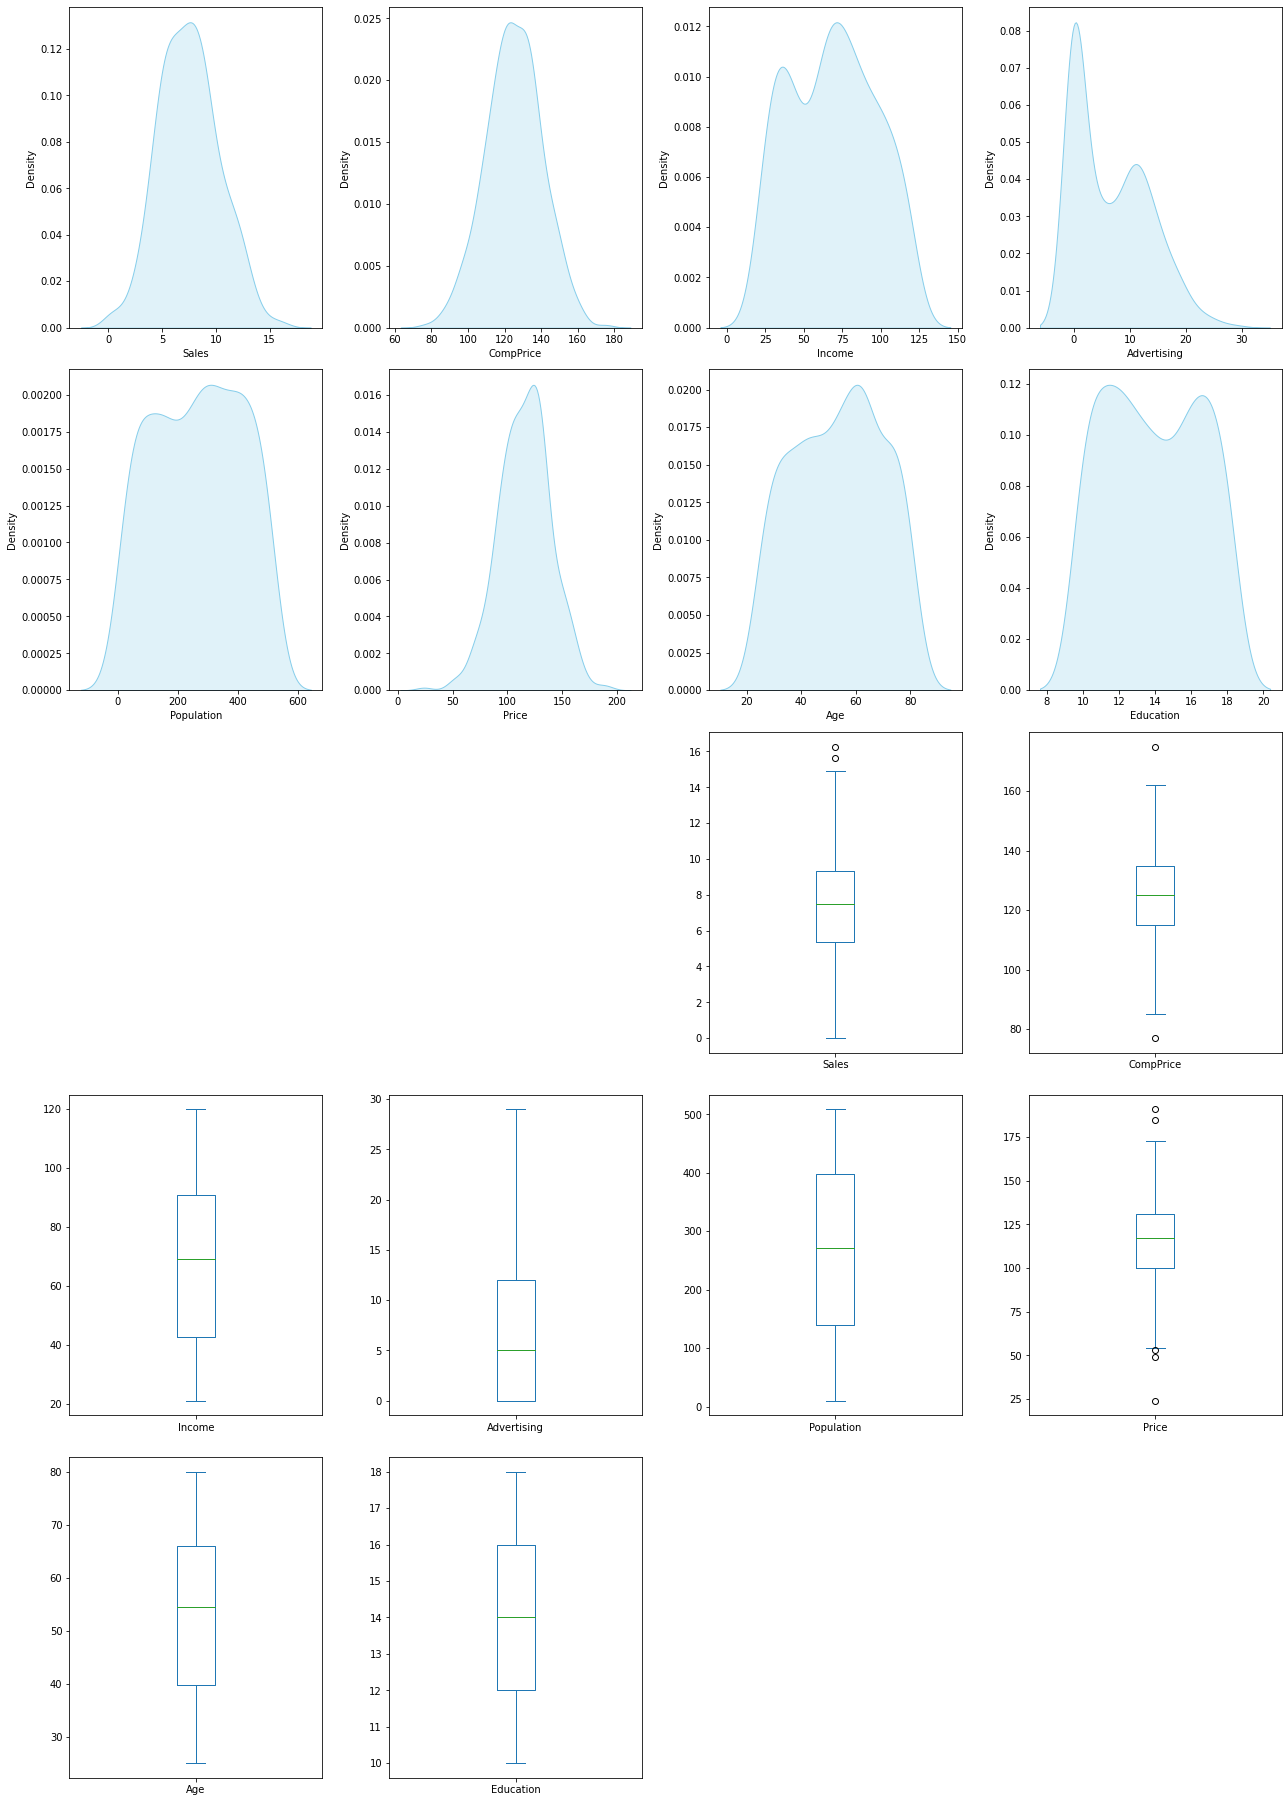

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [69]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(data[col],color='skyblue',shade=True)
    plt.subplot(8,4,i+10)
    data[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = data[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

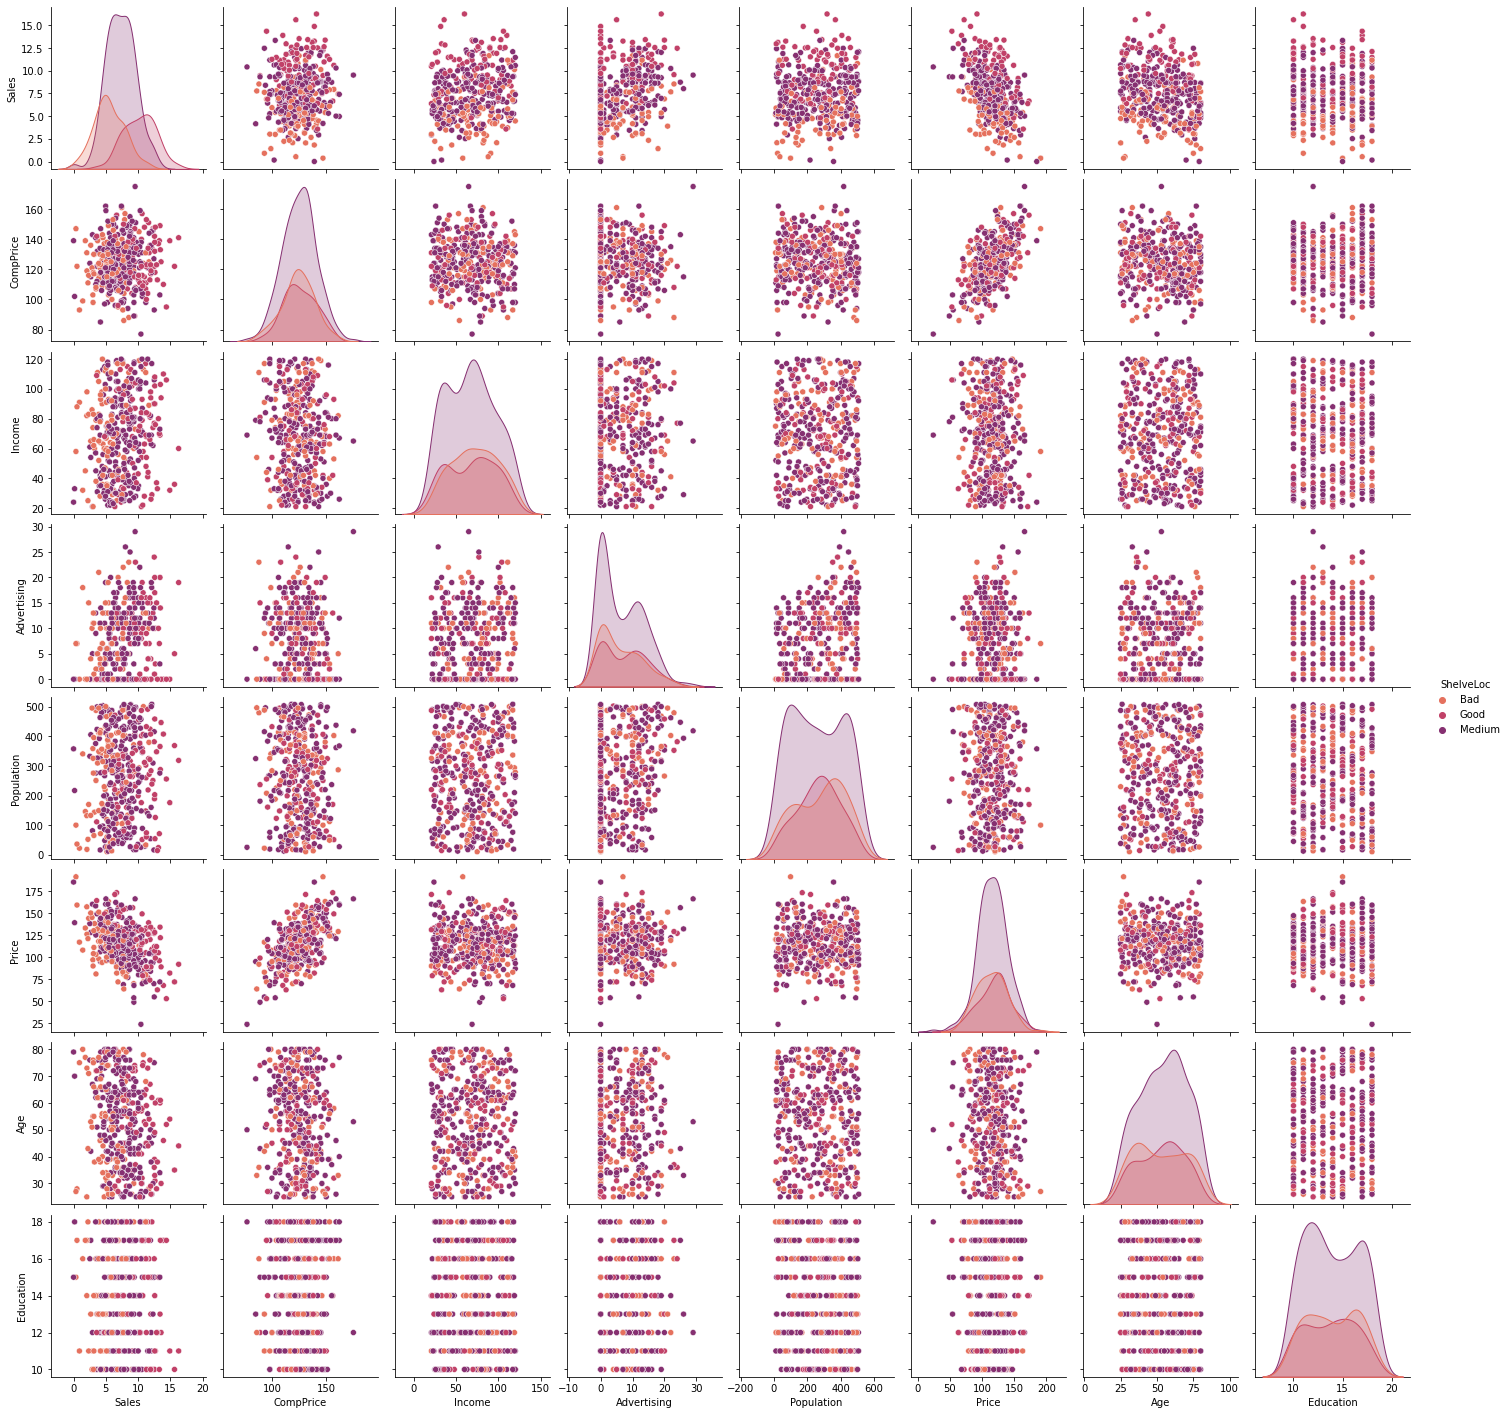

In [70]:
sns.pairplot(data, hue = 'ShelveLoc', palette='flare')

In [71]:
data = pd.get_dummies(data, columns = ['US','ShelveLoc','Urban'])

In [72]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'US_No', 'US_Yes', 'ShelveLoc_Bad',
       'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_No', 'Urban_Yes'],
      dtype='object')

In [73]:
corr = data.corr()

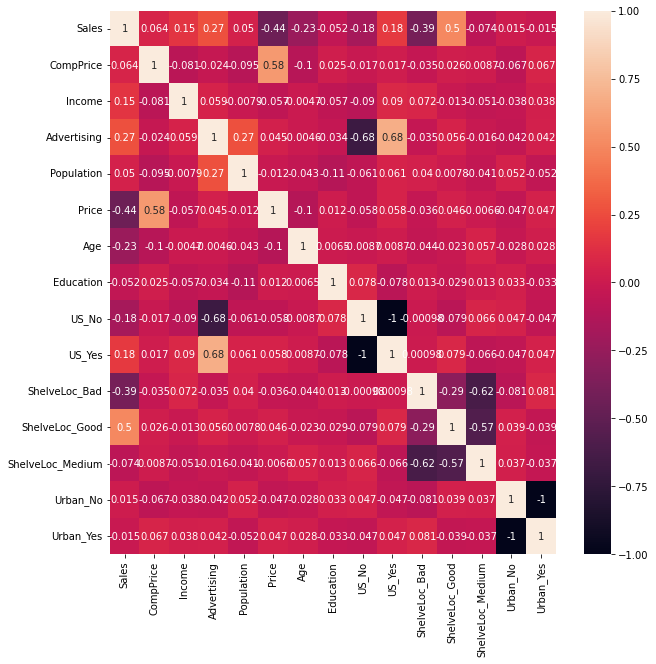

In [74]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True,)

# Model Building

Since the target variable is continious, we create a class of the value based on the 50%,50% of the Sales column.

small sale = "0"

large sale = "1"

<= 5 == "0" , > 5 == "1"

In [75]:
data.loc[data['Sales']<5,"sales"]='0'
data.loc[data["Sales"]>5,"sales"]="1"
data.drop(["Sales"],axis=1,inplace=True)

In [76]:
df1 = data.fillna(0)

In [77]:
df1.isnull().sum()

CompPrice           0
Income              0
Advertising         0
Population          0
Price               0
Age                 0
Education           0
US_No               0
US_Yes              0
ShelveLoc_Bad       0
ShelveLoc_Good      0
ShelveLoc_Medium    0
Urban_No            0
Urban_Yes           0
sales               0
dtype: int64

In [78]:
df1['sales'] = df1['sales'].astype(int)

In [79]:
df1.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'US_No', 'US_Yes', 'ShelveLoc_Bad', 'ShelveLoc_Good',
       'ShelveLoc_Medium', 'Urban_No', 'Urban_Yes', 'sales'],
      dtype='object')

In [80]:
df1.shape

(400, 15)

In [81]:
X = df1.iloc[:,0:14]
y = df1.iloc[:,14]

In [88]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, stratify = y, random_state = 42)

In [89]:
y_train.value_counts()

1    258
0     62
Name: sales, dtype: int64

In [127]:
# using Entropy Criterion

model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [94]:
pred_train = model.predict(x_train)

In [95]:
accuracy_score(y_train,pred_train)

0.821875

In [96]:
confusion_matrix(y_train,pred_train)

array([[ 33,  29],
       [ 28, 230]])

In [110]:
confusion_matrix(y_test,pred_test)

array([[ 5, 10],
       [ 6, 59]])

In [109]:
pred_test = model.predict(x_test)

In [105]:
accuracy_score(y_test,pred_test)

0.8

In [107]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [108]:
df_t

,Actual,Predicted
58,1,0
276,1,1
212,1,1
87,1,1
183,1,1
...,...,...
66,1,1
258,0,1
244,1,1
301,1,1


In [126]:
# using Gini Criterion

model1 = DT(criterion='gini') 
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [114]:
pred_train1 = model1.predict(x_train)

In [115]:
accuracy_score(y_train,pred_train1)

1.0

In [116]:
confusion_matrix(y_train,pred_train1)

array([[ 62,   0],
       [  0, 258]])

In [117]:
pred_test1 = model1.predict(x_test)

In [119]:
accuracy_score(y_test,pred_test1)

0.825

In [120]:
df_t1=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test1})

In [121]:
df_t1

,Actual,Predicted
58,1,0
276,1,1
212,1,1
87,1,1
183,1,1
...,...,...
66,1,1
258,0,1
244,1,1
301,1,1


In [122]:
cols = list(df1.columns)

In [123]:
predictors = cols[0:14]
target = cols[14]

In [124]:
dot_data = StringIO()

In [128]:
export_graphviz(model1,out_file = dot_data, filled =True, rounded = True, feature_names =predictors,class_names = target, impurity = False )

In [129]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [130]:
graph.write_png('company_data.png')

True

# Conclusion
Since the accuracy of the Training set is 100% we got the accurancy on the Test data which is 82.5% in **Gini Criterion**.  
The Training set is 82.18% we got the accurancy on the Test data which is 80% in **Entropy Criterion**.

In [131]:
img = mpimg.imread('company_data.png')

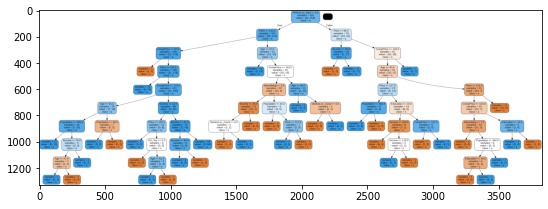

In [132]:
plt.imshow(img)

In [133]:
model1.feature_importances_

array([0.16970357, 0.08790206, 0.03852623, 0.08879998, 0.2104299 ,
       0.18337439, 0.06542112, 0.        , 0.01500375, 0.11749984,
       0.02333917, 0.        , 0.        , 0.        ])

In [134]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model1.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [135]:
fi

,feature,importance
4,Price,0.210430
5,Age,0.183374
0,CompPrice,0.169704
9,ShelveLoc_Bad,0.117500
3,Population,0.088800
1,Income,0.087902
6,Education,0.065421
2,Advertising,0.038526
10,ShelveLoc_Good,0.023339
8,US_Yes,0.015004


From the above table, we can say that the Price is the most important feature from the dataset.